## Setup

In [ ]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/ADS/ubaar-data.csv')
print(df.shape)

Mounted at /content/drive
(44052, 30)


In [ ]:
df.head(5)

,Load Type,Source City,Destination City,Source State,Destination State,Source Region,Destination Region,Who Added Role,Driver Income,Weight,...,Destination Lat,Destination Lng,Dispatch Time Delta,Pickup Date Time Delta,Order Channel,Packaging Type,Creation Datetime,Unload Option,Has Comments,Load Status
0,بار صنعتی,یزد,بندرعباس,یزد,هرمزگان,یزد,بندرعباس,anonymous,0.0,24.0,...,27.183222,56.266646,23.928889,NaN,NaN,hichkodam,2019-11-05 06:46:15.847289+00:00,NaN,0,reject_price
1,بار صنعتی,قزوین,رودسر,قزوین,گیلان,قزوین,چابکسر,anonymous,0.0,5.0,...,36.980067,50.531772,23.970278,NaN,NaN,hichkodam,2019-11-05 20:01:46.763769+00:00,NaN,0,reject_price
2,بار صنعتی,تهران,همدان,تهران,همدان,تهران,همدان,anonymous,0.0,2.0,...,34.798857,48.515023,23.962778,NaN,NaN,hichkodam,2019-11-06 09:13:13.686217+00:00,NaN,0,reject_price
3,بار صنعتی,آمل,گرگان,مازندران,گلستان,آمل,گرگان,anonymous,0.0,15.0,...,36.845643,54.439336,23.974722,NaN,NaN,hichkodam,2019-10-31 09:52:30.930302+00:00,NaN,0,reject_price
4,گلدان پلاستیکی,هشتگرد,اردبیل,البرز,اردبیل,پل کردان,اردبیل,baarbari,0.0,2.0,...,38.256645,48.317509,16.749444,68.358889,web,karton,2019-11-20 13:45:01.859383+00:00,day,0,delivered


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44052 entries, 0 to 44051
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Load Type               44052 non-null  object 
 1   Source City             44052 non-null  object 
 2   Destination City        44052 non-null  object 
 3   Source State            44052 non-null  object 
 4   Destination State       44052 non-null  object 
 5   Source Region           44052 non-null  object 
 6   Destination Region      44052 non-null  object 
 7   Who Added Role          44052 non-null  object 
 8   Driver Income           44052 non-null  float64
 9   Weight                  44052 non-null  float64
 10  Distance                44052 non-null  float64
 11  Duration                44052 non-null  float64
 12  Vehicle Type            44052 non-null  object 
 13  Vehicle Options         44052 non-null  object 
 14  Baarnameh Type          38366 non-null

In [ ]:
df.describe()

,Driver Income,Weight,Distance,Duration,Transport Cost,Source Lat,Source Lng,Destination Lat,Destination Lng,Dispatch Time Delta,Pickup Date Time Delta,Has Comments
count,4.405200e+04,44052.000000,44052.000000,44052.000000,4.405200e+04,44052.000000,44052.000000,44052.000000,44052.000000,44052.000000,2808.000000,44052.000000
mean,3.677479e+11,7.860764,486.471045,5.681138,3.677479e+11,34.751266,51.545719,34.018325,51.926935,28.755725,27.093312,0.362458
std,7.718487e+13,7.912958,440.643799,4.893344,7.718487e+13,2.201000,2.750519,3.039853,3.837871,59.757645,22.847216,0.480716
min,0.000000e+00,0.020000,0.000000,0.000000,0.000000e+00,24.494214,28.953026,24.494214,28.953026,-4.676944,0.006667,0.000000
25%,0.000000e+00,2.000000,50.000000,1.000000,0.000000e+00,33.640419,50.681933,32.198349,49.587414,3.048333,17.518611,0.000000
50%,1.800000e+05,4.000000,442.701000,4.861806,1.850000e+05,35.688905,51.388435,35.490586,51.388435,18.008333,21.120972,0.000000
75%,1.000000e+06,11.000000,817.966000,9.536319,1.000000e+06,35.837669,51.667983,36.271035,53.031317,24.240069,29.626528,1.000000
max,1.620000e+16,25.000000,2622.035000,28.618889,1.620000e+16,41.052112,69.870829,41.052112,69.870829,2204.550833,481.925000,1.000000


# EDA


## Getting Some Insights

In [ ]:
df['Packaging Type'].value_counts()

hichkodam      15319
karton         11464
falleh          6341
kiseh_gooni     5647
pallet          3443
roll            1042
bandil           796
Name: Packaging Type, dtype: int64

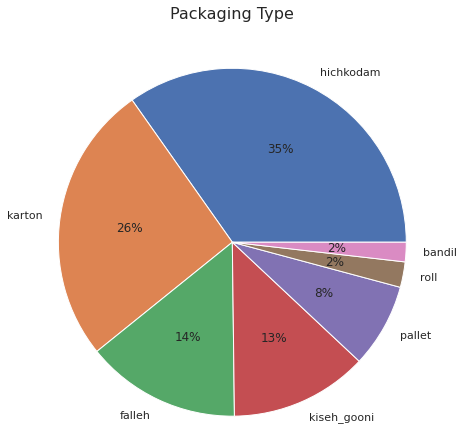

In [ ]:
  df['Packaging Type'].value_counts().plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
  plt.title('Packaging Type', y=1.5,fontsize=16)
  plt.show()


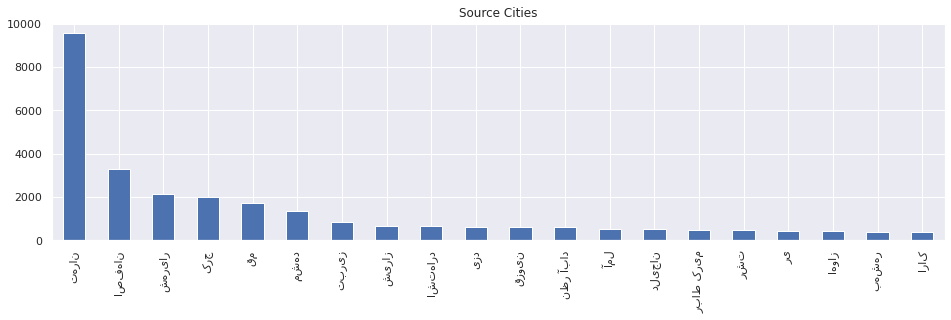

In [ ]:
df['Source City'].value_counts()[:20].plot.bar(figsize=(16, 4),title='Source Cities')

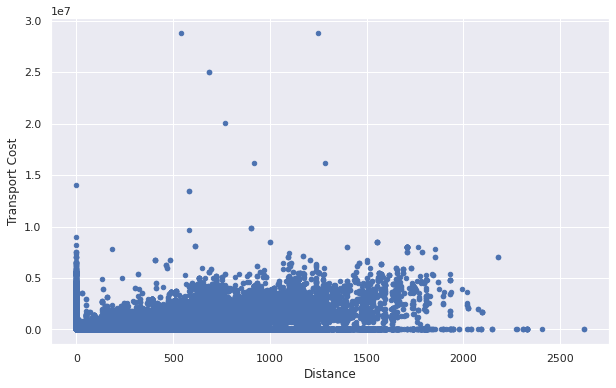

In [ ]:
df2 = df[df['Transport Cost'] < 1e10]  # Remove outlier
df2.plot(kind='scatter', x='Distance', y='Transport Cost', color='b',figsize=(10, 6))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


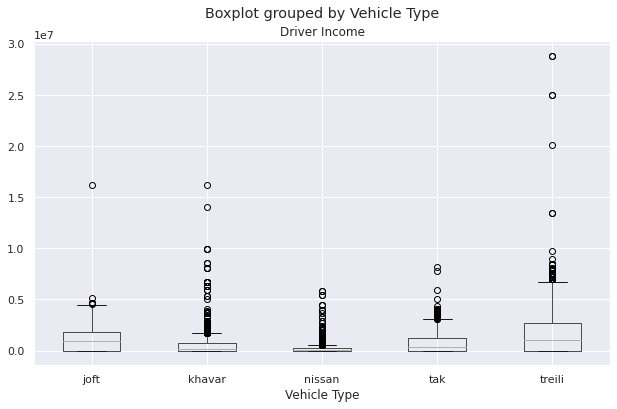

In [ ]:
df2 = df[df['Driver Income'] < 2e10]  # Remove outlier
df2.boxplot('Driver Income', by='Vehicle Type',figsize=(10, 6))

In [ ]:
df[df["Vehicle Type"] == "nissan"]['Order Channel'].value_counts()

android    5243
web        2120
Name: Order Channel, dtype: int64

In [ ]:
df[df["Vehicle Type"] == "nissan"]['Load Type'].value_counts()

میوه                       1612
بار صنعتی                  1517
اثاث منزل                  1204
مواد غذایی                  768
سایر                        535
                           ... 
دستگاه اسپرسو ساز صنعتی       1
گلدان                         1
تردمیل                        1
مخزن                          1
کالای خواب                    1
Name: Load Type, Length: 234, dtype: int64

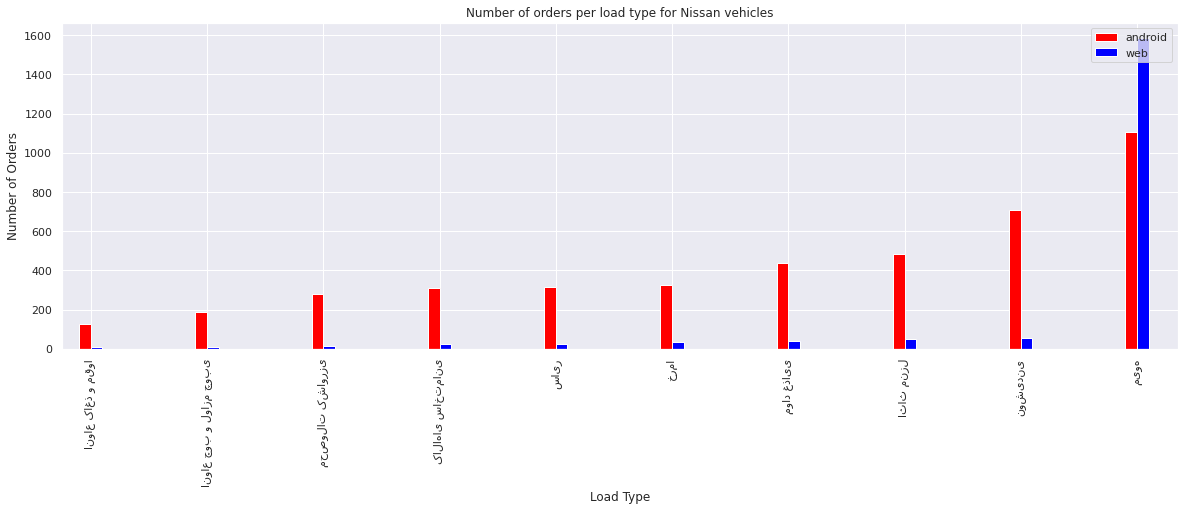

In [ ]:
fig = plt.figure(figsize=(20, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.1

load_types = df[df["Vehicle Type"] == "nissan"]['Load Type'].value_counts()[:10].index
colors = ["red", "orange", "blue", "green", "black"]


lns1 = df[(df["Vehicle Type"] == "nissan") & (df['Order Channel'] == 'android')].groupby(['Load Type']).size().sort_values()[-10:].plot(kind='bar', color='red', width=width, position=1,label="android")
lns1 = df[(df["Vehicle Type"] == "nissan") & (df['Order Channel'] == 'web')].groupby(['Load Type']).size().sort_values()[-10:].plot(kind='bar', color='blue', width=width, position=0,label="web")



ax.set_ylabel('Number of Orders')

plt.legend(loc='upper right')
ax.set_title('Number of orders per load type for Nissan vehicles')
plt.show()


## Data Cleaning

### Missing Values

In [ ]:
df.isnull().sum()

Load Type                     0
Source City                   0
Destination City              0
Source State                  0
Destination State             0
Source Region                 0
Destination Region            0
Who Added Role                0
Driver Income                 0
Weight                        0
Distance                      0
Duration                      0
Vehicle Type                  0
Vehicle Options               0
Baarnameh Type             5686
Transport Cost                0
Dispatch Date                 0
Dipatch Time                  0
Source Lat                    0
Source Lng                    0
Destination Lat               0
Destination Lng               0
Dispatch Time Delta           0
Pickup Date Time Delta    41244
Order Channel              8184
Packaging Type                0
Creation Datetime             0
Unload Option              6103
Has Comments                  0
Load Status                   0
dtype: int64

Almost all the rows miss the value of `Pickup Date Time Delta`. So we drop this column

In [ ]:
df.drop(['Pickup Date Time Delta'], axis=1, inplace=True)
df.shape

(44052, 29)

In [ ]:
df[df['Baarnameh Type'].isnull() | df['Order Channel'].isnull() | df['Unload Option'].isnull()]

,Load Type,Source City,Destination City,Source State,Destination State,Source Region,Destination Region,Who Added Role,Driver Income,Weight,...,Source Lng,Destination Lat,Destination Lng,Dispatch Time Delta,Order Channel,Packaging Type,Creation Datetime,Unload Option,Has Comments,Load Status
0,بار صنعتی,یزد,بندرعباس,یزد,هرمزگان,یزد,بندرعباس,anonymous,0.0,24.0,...,54.360979,27.183222,56.266646,23.928889,NaN,hichkodam,2019-11-05 06:46:15.847289+00:00,NaN,0,reject_price
1,بار صنعتی,قزوین,رودسر,قزوین,گیلان,قزوین,چابکسر,anonymous,0.0,5.0,...,50.012455,36.980067,50.531772,23.970278,NaN,hichkodam,2019-11-05 20:01:46.763769+00:00,NaN,0,reject_price
2,بار صنعتی,تهران,همدان,تهران,همدان,تهران,همدان,anonymous,0.0,2.0,...,51.388435,34.798857,48.515023,23.962778,NaN,hichkodam,2019-11-06 09:13:13.686217+00:00,NaN,0,reject_price
3,بار صنعتی,آمل,گرگان,مازندران,گلستان,آمل,گرگان,anonymous,0.0,15.0,...,52.350694,36.845643,54.439336,23.974722,NaN,hichkodam,2019-10-31 09:52:30.930302+00:00,NaN,0,reject_price
5,بار صنعتی,کازرون,تهران,فارس,تهران,قیروکازین,تهران,anonymous,0.0,5.0,...,52.959966,35.688905,51.388435,23.968056,NaN,hichkodam,2019-10-31 04:34:54.206605+00:00,NaN,0,reject_price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44035,بار صنعتی,یزد,تهران,یزد,تهران,یزد,تهران,anonymous,0.0,5.0,...,54.360979,35.688905,51.388435,23.973056,NaN,hichkodam,2019-11-01 20:01:36.927110+00:00,NaN,0,reject_price
44036,بار صنعتی,میناب,تهران,هرمزگان,تهران,میناب,شمال تهران,anonymous,0.0,10.0,...,57.067503,35.787602,51.425803,23.963056,NaN,hichkodam,2019-11-02 14:49:12.334306+00:00,NaN,0,reject_price
44037,بار صنعتی,فلاورجان,اهواز,اصفهان,خوزستان,قهدریجان,اهواز,anonymous,0.0,10.0,...,51.444482,31.326073,48.674809,23.982778,NaN,hichkodam,2019-10-31 04:00:01.257789+00:00,NaN,1,reject_price
44048,بار صنعتی,تهران,نور,تهران,مازندران,تهران,رویان,anonymous,0.0,2.0,...,51.388435,36.566512,51.960662,24.012500,NaN,hichkodam,2019-11-02 09:18:14.193466+00:00,NaN,0,reject_price


In [ ]:
df[df['Baarnameh Type'].isnull() | df['Order Channel'].isnull() | df['Unload Option'].isnull()].shape

(8184, 29)

For remaining missinng values, there is no easy way to estimate them or find them from external sources. In addition to that, we can see the rows with missing values from different columns have a large intersection. Therefore, by dropping all these rows we will not loose too much of the rows.

In [ ]:
df.dropna(inplace=True)
df.shape

(35868, 29)

### Invalid Data

In [ ]:
df.describe()

,Driver Income,Weight,Distance,Duration,Transport Cost,Source Lat,Source Lng,Destination Lat,Destination Lng,Dispatch Time Delta,Has Comments
count,3.586800e+04,35868.000000,35868.000000,35868.000000,3.586800e+04,35868.000000,35868.000000,35868.000000,35868.000000,35868.000000,35868.000000
mean,4.516569e+11,7.717787,478.915209,5.608270,4.516569e+11,34.752736,51.519125,33.997342,51.922903,29.046785,0.393136
std,8.553846e+13,7.894982,440.805794,4.905950,8.553846e+13,2.172747,2.741126,3.023800,3.840593,63.479663,0.488453
min,0.000000e+00,0.020000,0.000000,0.000000,0.000000e+00,24.494214,28.953026,24.494214,28.953026,-4.676944,0.000000
25%,0.000000e+00,2.000000,50.000000,0.866111,0.000000e+00,33.691995,50.619571,32.056827,49.587414,2.028333,0.000000
50%,3.840000e+05,4.000000,419.147000,4.809722,3.800000e+05,35.670677,51.388435,35.458503,51.388435,14.916111,0.000000
75%,1.212000e+06,11.000000,804.962000,9.476944,1.210000e+06,35.837669,51.696110,36.271035,53.031317,24.394167,1.000000
max,1.620000e+16,25.000000,2622.035000,28.618889,1.620000e+16,41.052112,69.870829,41.052112,69.870829,2204.550833,1.000000


* `Lat, Lng` columns seem okay. The values are within Iran.
* `Has Comments` is okay. It is a boolean column.
* `Weight` seems okay. The range of values is [0.02, 25] perhaps in 1K Kgs scale.
* `Dispatch Time Delta` has negative values and also very large values. Needs more investigation.
* The columns `Driver Income, Distance, Duration, Transport Cost` have zero min. It is not possible for a valid real order. Is it a king of missing value indicator? Needs more investigation.
* The `1e16` seems off as the maximum value for `Driver Income` and `Transport Cost`. Does not feel real.

In [ ]:
df[['Dispatch Date', 'Dipatch Time', 'Creation Datetime', 'Dispatch Time Delta']]

,Dispatch Date,Dipatch Time,Creation Datetime,Dispatch Time Delta
4,1398-08-30,10:00:00,2019-11-20 13:45:01.859383+00:00,16.749444
8,1398-07-23,11:30:00,2019-10-15 07:35:48.686186+00:00,0.403056
9,1398-08-04,8:00:00,2019-10-24 13:12:40.461622+00:00,39.288611
10,1398-08-16,10:00:00,2019-11-06 17:01:01.501348+00:00,13.482778
14,1398-08-11,15:00:00,2019-11-02 07:24:31.415289+00:00,4.091111
...,...,...,...,...
44045,1398-08-10,11:00:00,2019-10-29 05:00:23.122293+00:00,74.493333
44046,1398-08-16,12:30:00,2019-11-07 05:07:52.473923+00:00,3.868611
44047,1398-08-09,3:00:00,2019-10-30 23:18:56.706587+00:00,0.184167
44050,1398-08-16,9:30:00,2019-11-07 05:37:41.824758+00:00,0.371667


We can see no clue from other datetime fields to decide whether negative values for `Dispatch Time Delta` are invalid. So we leave it there.

In [ ]:
print(df[df['Duration'] ==0].shape)
print(df[(df['Duration'] ==0) | (df['Distance'] ==0)].shape)
print(df[df['Transport Cost'] ==0].shape)
print(df[(df['Transport Cost'] ==0) | (df['Driver Income'] ==0)].shape)
print(df[(df['Transport Cost'] ==0) | (df['Duration'] ==0)].shape)

(6841, 29)
(6841, 29)
(12895, 29)
(12895, 29)
(16355, 29)


In [ ]:
df[df['Distance'] ==0]['Load Status'].value_counts()

reject_price    2961
notfound        2749
cancelled        915
delivered        158
pickedup          58
Name: Load Status, dtype: int64

In [ ]:
df[df['Transport Cost'] == 0]['Load Status'].value_counts()

reject_price    10135
notfound         2119
cancelled         600
delivered          26
pickedup           15
Name: Load Status, dtype: int64

As we can see the pair of columns `Driver Income` and `Transport Cost` and the pair of `Distance` and `Duration` are zero at the same time.

Dropping these rows almost cuts the dataset size in half. Taking such a decision is dependent on the analysis objective. For example, if the neccessary API is provided distance can be calculated based on source and destination points.

For now, we drop such rows.

In [ ]:
df.drop(df[(df['Transport Cost'] ==0) | (df['Duration'] ==0)].index, inplace=True)
df.shape

(19513, 29)

### Dealing with outliers

As we stated before, there seems to be some odd large values for `Transport Cost'. Lets look closer.

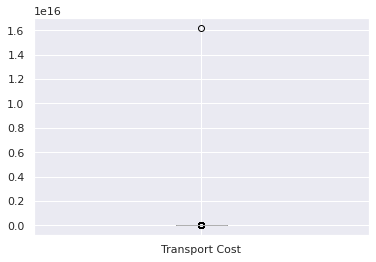

In [ ]:
df.boxplot(column=['Transport Cost'])

Okay! Let's get rid of this really odd record!

In [ ]:
df = df[df['Transport Cost'] < 1e10]


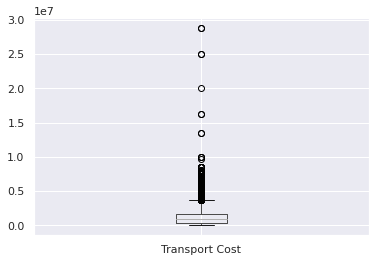

In [ ]:
df.boxplot(column=['Transport Cost'])

Still there are some outliers. Let's go more aggressive.

In [ ]:
col = ['Transport Cost']
Q1 = df[col].quantile(0.1)  # Find first quantile range
Q4 = df[col].quantile(0.9)  # and 5th quantile range
IQR = Q4 - Q1
df = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q4 + 1.5 * IQR))).any(axis=1)]

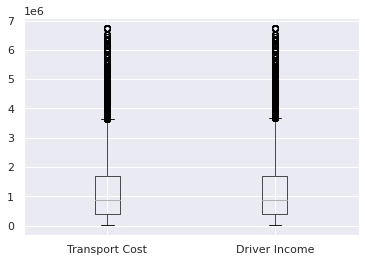

In [ ]:
df.boxplot(column=['Transport Cost', 'Driver Income'])

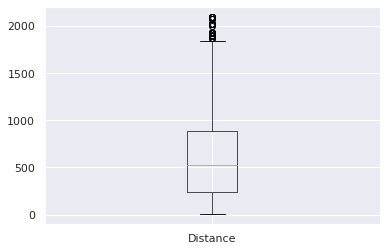

In [ ]:
df.boxplot(column=['Distance'])


Now things look okay!

## Data Preproccessing

In [ ]:
df.columns

Index(['Load Type', 'Source City', 'Destination City', 'Source State',
       'Destination State', 'Source Region', 'Destination Region',
       'Who Added Role', 'Driver Income', 'Weight', 'Distance', 'Duration',
       'Vehicle Type', 'Vehicle Options', 'Baarnameh Type', 'Transport Cost',
       'Dispatch Date', 'Dipatch Time', 'Source Lat', 'Source Lng',
       'Destination Lat', 'Destination Lng', 'Dispatch Time Delta',
       'Order Channel', 'Packaging Type', 'Creation Datetime', 'Unload Option',
       'Has Comments', 'Load Status'],
      dtype='object')

Categorical encoding!

In [ ]:
to_categorical_columns = [
    'Load Type', 'Source City', 'Destination City', 'Source State',
    'Destination State', 'Source Region', 'Destination Region',
    'Vehicle Type', 'Vehicle Options', 'Baarnameh Type', 'Packaging Type',
    'Unload Option', 'Load Status',
]
for column in to_categorical_columns:
  df[column] = df[column].astype('category').cat.codes

df.head(5)

,Load Type,Source City,Destination City,Source State,Destination State,Source Region,Destination Region,Who Added Role,Driver Income,Weight,...,Source Lng,Destination Lat,Destination Lng,Dispatch Time Delta,Order Channel,Packaging Type,Creation Datetime,Unload Option,Has Comments,Load Status
8,92,19,254,4,10,207,356,baarbari,1100000.0,4.0,...,50.312067,36.272622,59.600624,0.403056,android,1,2019-10-15 07:35:48.686186+00:00,0,0,0
9,93,65,13,7,22,89,16,user,744000.0,15.0,...,51.388435,34.095355,49.701349,39.288611,android,4,2019-10-24 13:12:40.461622+00:00,0,1,0
14,321,240,10,31,21,380,11,user,400000.0,4.0,...,55.167322,36.467626,52.350694,4.091111,web,2,2019-11-02 07:24:31.415289+00:00,0,0,0
16,97,21,254,3,10,27,356,user,1160000.0,1.0,...,51.667983,36.272622,59.600624,1.726389,android,2,2019-11-16 16:46:24.042161+00:00,0,0,2
17,594,140,91,7,7,44,118,admin,190000.0,1.0,...,51.136615,35.688905,51.388435,13.260278,web,2,2019-12-11 11:14:22.545866+00:00,0,1,0


One-hot Encoding!

In [ ]:
to_one_hot_columns = ["Who Added Role", 'Order Channel']
for column in to_one_hot_columns:
    encoded_df = pd.get_dummies(df[column])
    df[encoded_df.columns] = encoded_df     # Insert the newly encoded columns into the dataset
df.head(5)

,Load Type,Source City,Destination City,Source State,Destination State,Source Region,Destination Region,Who Added Role,Driver Income,Weight,...,Creation Datetime,Unload Option,Has Comments,Load Status,admin,baarbari,user,android,ios,web
8,92,19,254,4,10,207,356,baarbari,1100000.0,4.0,...,2019-10-15 07:35:48.686186+00:00,0,0,0,0,1,0,1,0,0
9,93,65,13,7,22,89,16,user,744000.0,15.0,...,2019-10-24 13:12:40.461622+00:00,0,1,0,0,0,1,1,0,0
14,321,240,10,31,21,380,11,user,400000.0,4.0,...,2019-11-02 07:24:31.415289+00:00,0,0,0,0,0,1,0,0,1
16,97,21,254,3,10,27,356,user,1160000.0,1.0,...,2019-11-16 16:46:24.042161+00:00,0,0,2,0,0,1,1,0,0
17,594,140,91,7,7,44,118,admin,190000.0,1.0,...,2019-12-11 11:14:22.545866+00:00,0,1,0,1,0,0,0,0,1


DateTime columns!

In [ ]:
!pip install jdatetime

df['Creation Datetime'] = pd.to_datetime(df['Creation Datetime']).values.astype(np.int64)

import jdatetime as jdt
def read_dispatch_datetime(x):
  t = x['Dipatch Time']
  if len(t) < 8:
    t = '0' + t
  return jdt.datetime.strptime(x['Dispatch Date'] + 'T' + t, "%Y-%m-%dT%H:%M:%S").togregorian().timestamp()

df['Dispatch Datetime'] = df.apply(read_dispatch_datetime, axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df[['Creation Datetime', 'Dispatch Datetime']].head()

,Creation Datetime,Dispatch Datetime
8,1571124948686186000,1.571139e+09
9,1571922760461622000,1.572077e+09
14,1572679471415289000,1.572707e+09
16,1573922784042161000,1.573942e+09
17,1576062862545866000,1.576123e+09


Drop `object` columns

In [ ]:
non_numeric_columns = df.select_dtypes(include = "object").columns
df.drop(non_numeric_columns, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19455 entries, 8 to 44050
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Load Type            19455 non-null  int16  
 1   Source City          19455 non-null  int16  
 2   Destination City     19455 non-null  int16  
 3   Source State         19455 non-null  int8   
 4   Destination State    19455 non-null  int8   
 5   Source Region        19455 non-null  int16  
 6   Destination Region   19455 non-null  int16  
 7   Driver Income        19455 non-null  float64
 8   Weight               19455 non-null  float64
 9   Distance             19455 non-null  float64
 10  Duration             19455 non-null  float64
 11  Vehicle Type         19455 non-null  int8   
 12  Vehicle Options      19455 non-null  int16  
 13  Baarnameh Type       19455 non-null  int8   
 14  Transport Cost       19455 non-null  float64
 15  Source Lat           19455 non-null 

### Standardization/Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standard_scaling_columns = df.columns    # Specify the columns to standard scale
df[standard_scaling_columns] = scaler.fit_transform(df[standard_scaling_columns])
df[standard_scaling_columns].describe()

,Load Type,Source City,Destination City,Source State,Destination State,Source Region,Destination Region,Driver Income,Weight,Distance,...,Unload Option,Has Comments,Load Status,admin,baarbari,user,android,ios,web,Dispatch Datetime
count,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,...,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04,1.945500e+04
mean,4.382685e-17,-2.410477e-17,-1.154107e-16,2.045253e-17,8.418407e-17,-1.344023e-16,6.281848e-17,-2.045253e-17,3.798327e-17,7.304474e-17,...,9.495817e-18,7.669698e-18,-1.110280e-16,8.765369e-18,-1.256370e-16,-1.139498e-16,-1.197934e-16,-6.939251e-18,5.551400e-17,-5.203123e-14
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,...,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-1.828116e+00,-1.609301e+00,-1.576766e+00,-1.306553e+00,-1.422395e+00,-1.404123e+00,-1.526443e+00,-1.119076e+00,-9.696138e-01,-1.393947e+00,...,-3.514455e-02,-8.393365e-01,-1.497357e+00,-5.492596e-01,-4.019476e-01,-1.302484e+00,-1.348610e+00,-1.897193e-02,-7.409217e-01,-2.093202e+00
25%,-8.243492e-01,-6.751648e-01,-7.191346e-01,-5.349813e-01,-6.989772e-01,-8.509182e-01,-7.421004e-01,-7.553955e-01,-7.187026e-01,-8.130104e-01,...,-3.514455e-02,-8.393365e-01,-7.680772e-01,-5.492596e-01,-4.019476e-01,-1.302484e+00,-1.348610e+00,-1.897193e-02,-7.409217e-01,-7.966677e-01
50%,3.630339e-01,-1.290546e-01,-2.698988e-01,-5.349813e-01,-3.889410e-01,-2.296272e-01,-2.121389e-01,-3.189792e-01,-4.652570e-01,-1.412751e-01,...,-3.514455e-02,-8.393365e-01,-3.879746e-02,-5.492596e-01,-4.019476e-01,7.677635e-01,7.415044e-01,-1.897193e-02,-7.409217e-01,2.074876e-01
75%,5.956141e-01,7.907101e-01,9.961292e-01,7.877130e-01,7.478584e-01,8.938031e-01,9.679085e-01,4.302021e-01,5.485256e-01,7.310975e-01,...,-3.514455e-02,1.191417e+00,1.419762e+00,-5.492596e-01,-4.019476e-01,7.677635e-01,7.415044e-01,-1.897193e-02,1.349670e+00,8.094690e-01
max,1.742194e+00,1.897302e+00,1.863971e+00,2.330856e+00,2.091349e+00,1.872549e+00,1.822913e+00,5.018029e+00,2.195922e+00,3.639793e+00,...,2.845391e+01,1.191417e+00,1.419762e+00,1.820633e+00,2.487886e+00,7.677635e-01,7.415044e-01,5.270945e+01,1.349670e+00,4.060006e+00


## Correlation Analysis

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Load Type,Source City,Destination City,Source State,Destination State,Source Region,Destination Region,Driver Income,Weight,Distance,Duration,Vehicle Type,Vehicle Options,Baarnameh Type,Transport Cost,Source Lat,Source Lng,Destination Lat,Destination Lng,Dispatch Time Delta,Packaging Type,Creation Datetime,Unload Option,Has Comments,Load Status,admin,baarbari,user,android,ios,web,Dispatch Datetime
Load Type,1.000000,0.034321,-0.035145,0.035470,-0.015643,-0.038024,-0.035147,0.078637,0.112757,-0.020395,-0.016291,0.126214,0.079186,0.012741,0.077555,0.012883,-0.018273,0.024808,-0.029215,-0.044213,-0.024731,-0.009758,-0.012163,0.090732,-0.070533,0.118784,-0.066360,-0.056225,-0.097237,0.001657,0.097194,-0.015554
Source City,0.034321,1.000000,0.027013,0.239580,0.012541,0.804533,0.032925,-0.049994,0.005416,-0.050663,-0.055529,0.020857,0.024100,0.075001,-0.049936,0.008546,0.172196,0.009432,0.054847,-0.002237,-0.025274,-0.043945,-0.017541,0.044292,-0.085841,0.096224,0.012330,-0.092891,-0.124372,-0.004941,0.124596,-0.043682
Destination City,-0.035145,0.027013,1.000000,0.079725,0.345679,0.094286,0.928545,0.103384,0.076272,0.141080,0.137824,0.012141,0.036438,-0.083760,0.102001,-0.040902,0.033431,-0.065093,0.227688,0.013397,0.014115,0.030252,-0.024317,-0.061489,0.051245,-0.102367,0.038782,0.061641,0.077239,0.010569,-0.077675,0.031658
Source State,0.035470,0.239580,0.079725,1.000000,0.065448,0.255653,0.073001,0.177234,0.255156,0.147192,0.165065,0.106507,0.086588,-0.101647,0.174966,-0.251687,0.160353,-0.091101,0.027359,-0.012575,0.038353,-0.009891,0.002020,-0.081683,-0.000816,-0.039780,0.074287,-0.018468,0.024492,-0.006864,-0.024225,-0.011448
Destination State,-0.015643,0.012541,0.345679,0.065448,1.000000,0.092434,0.298533,0.120770,0.090307,0.138252,0.146605,0.002972,0.029191,-0.060770,0.120742,-0.061363,0.030909,-0.240374,0.126779,0.013287,-0.016473,-0.015149,-0.017755,-0.074361,0.079512,-0.090913,0.037655,0.052442,0.055011,-0.001777,-0.054953,-0.013176
Source Region,-0.038024,0.804533,0.094286,0.255653,0.092434,1.000000,0.110704,0.079949,0.117097,0.112716,0.107684,0.025990,0.063308,-0.060144,0.080236,-0.041156,0.178613,-0.065783,0.069676,0.022664,0.047166,-0.034594,-0.009541,-0.093583,0.025388,-0.139092,0.057857,0.080058,0.033619,-0.003618,-0.033483,-0.031116
Destination Region,-0.035147,0.032925,0.928545,0.073001,0.298533,0.110704,1.000000,0.092370,0.078897,0.109809,0.104132,0.001870,0.025759,-0.091794,0.091022,-0.023434,0.044288,-0.028244,0.219322,0.022676,0.014951,0.013472,-0.030334,-0.070565,0.046787,-0.078814,0.021227,0.053642,0.058936,0.009477,-0.059326,0.016335
Driver Income,0.078637,-0.049994,0.103384,0.177234,0.120770,0.079949,0.092370,1.000000,0.713262,0.642210,0.658664,0.434450,0.514130,-0.099761,0.999696,-0.054277,0.025390,-0.275381,0.113828,-0.006066,0.065474,-0.002860,-0.004145,-0.051976,0.047218,-0.136452,0.225708,-0.042495,0.033650,0.010187,-0.034061,-0.003636
Weight,0.112757,0.005416,0.076272,0.255156,0.090307,0.117097,0.078897,0.713262,1.000000,0.306495,0.321665,0.530271,0.576814,-0.060291,0.712726,-0.109542,0.002157,-0.168024,0.037339,-0.040485,0.039051,-0.010834,0.005082,-0.103792,0.031326,-0.068457,0.211381,-0.091630,-0.021836,0.009376,0.021469,-0.016116
Distance,-0.020395,-0.050663,0.141080,0.147192,0.138252,0.112716,0.109809,0.642210,0.306495,1.000000,0.991443,0.130442,0.159758,-0.140333,0.642361,-0.093854,0.121502,-0.406628,0.310109,0.065832,0.075933,0.028877,-0.007301,-0.124079,0.152165,-0.288639,0.186687,0.118404,0.205170,-0.003419,-0.205081,0.037323
